In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
other = pd.read_csv("data.csv")
other.head()

,x_c_dat1,accommodation,transport1,transport2,transport2_mask,indoor_leisure,indoor_leisure_mask,x_c_d1,x_c_d15,x_c_d2,...,x_w_62_Place2_l1,x_w_62_Place2_l2,x_w_62_Place3_l0,x_w_62_Place3_l1,x_w_62_Place3_l2,x_w_62_Place1_l0,x_w_62_Place1_l1,x_w_62_Place1_l2,x_c_d67_1,x_c_d67_1_Place4
0,39083,44.0,0,3621.0,0,1867.0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,39084,39.0,0,5222.0,0,2615.0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,39085,50.0,368,4169.0,0,2241.0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,39086,35.0,57,4252.0,0,2470.0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,39087,26.0,248,5059.0,0,2309.0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [3]:
feature1 = other["accommodation"]
feature1.head()

0    44.0
1    39.0
2    50.0
3    35.0
4    26.0
Name: accommodation, dtype: float64

In [4]:
from statsmodels.tsa.stattools import adfuller

In [9]:
adfuller(feature1.dropna())       # Calculating p-value for ARIMA parameters

7.322228471153604e-05

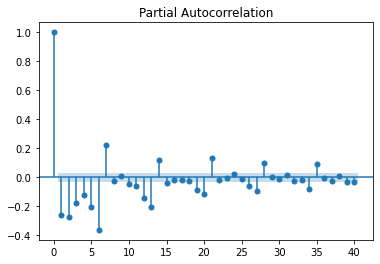

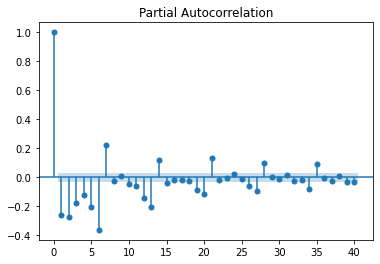

In [11]:
# d = 0
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(feature1.diff().dropna(), lags=40)

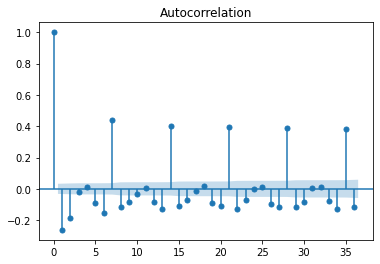

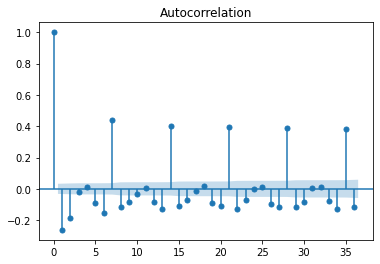

In [13]:
# let p = 1
plot_acf(feature1.diff().dropna())


In [15]:
# let q = 2
# order = (p=1,d=0,q=2)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(feature1, order=(1, 0, 2))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:          accommodation   No. Observations:                 3653
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -15088.643
Date:                Fri, 17 Dec 2021   AIC                          30187.287
Time:                        01:25:37   BIC                          30218.303
Sample:                             0   HQIC                         30198.332
                               - 3653                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.6070      3.592     17.431      0.000      55.568      69.646
ar.L1          0.9834      0.004    238.102      0.000       0.975       0.992
ma.L1         -0.4837      0.016    -30.895      0.0

In [16]:
model2 = ARIMA(feature1, order=(1, 0, 1))
results2 = model2.fit()
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:          accommodation   No. Observations:                 3653
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -15220.028
Date:                Fri, 17 Dec 2021   AIC                          30448.056
Time:                        01:33:11   BIC                          30472.869
Sample:                             0   HQIC                         30456.892
                               - 3653                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.6061      2.098     29.835      0.000      58.493      66.719
ar.L1          0.9434      0.008    122.255      0.000       0.928       0.958
ma.L1         -0.5558      0.015    -36.781      0.0

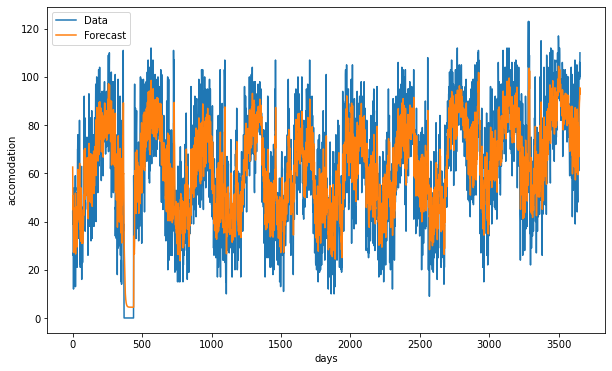

In [25]:
plt.figure(figsize=(10,6))
plt.plot(feature1, label='Data')
plt.plot(results.predict(), label='Forecast')
plt.xlabel("days")
plt.ylabel("accomodation")
plt.legend()
plt.savefig("accomodation_forecast")

In [26]:
feature2 = other["indoor_leisure"]
adfuller(feature1.dropna())[1]

7.322228471153604e-05

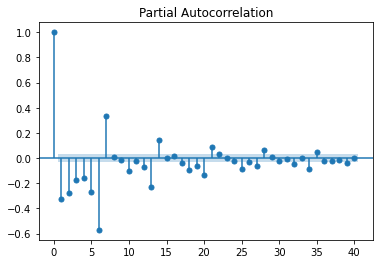

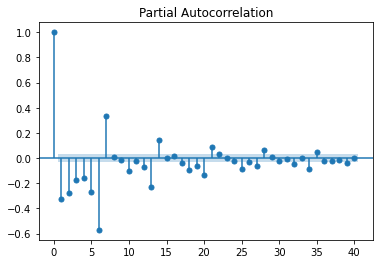

In [27]:
plot_pacf(feature2.diff().dropna(), lags=40)

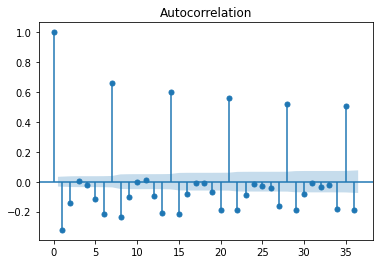

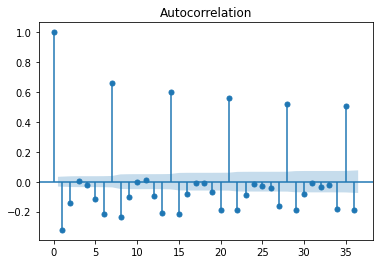

In [28]:
plot_acf(feature2.diff().dropna())

In [29]:
model2 = ARIMA(feature1, order=(1, 0, 2))
results2 = model2.fit()
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:          accommodation   No. Observations:                 3653
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -15088.643
Date:                Fri, 17 Dec 2021   AIC                          30187.287
Time:                        01:52:38   BIC                          30218.303
Sample:                             0   HQIC                         30198.332
                               - 3653                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.6070      3.592     17.431      0.000      55.568      69.646
ar.L1          0.9834      0.004    238.102      0.000       0.975       0.992
ma.L1         -0.4837      0.016    -30.895      0.0

In [30]:
model2 = ARIMA(feature1, order=(1, 0, 1))
results2 = model2.fit()
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:          accommodation   No. Observations:                 3653
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -15220.028
Date:                Fri, 17 Dec 2021   AIC                          30448.056
Time:                        01:52:57   BIC                          30472.869
Sample:                             0   HQIC                         30456.892
                               - 3653                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.6061      2.098     29.835      0.000      58.493      66.719
ar.L1          0.9434      0.008    122.255      0.000       0.928       0.958
ma.L1         -0.5558      0.015    -36.781      0.0

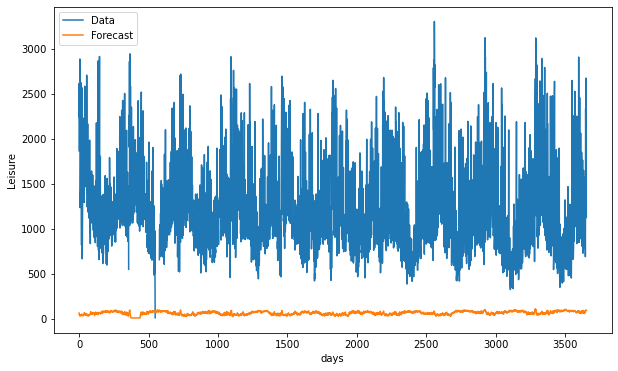

In [31]:
plt.figure(figsize=(10,6))
plt.plot(feature2, label='Data')
plt.plot(results2.predict(), label='Forecast')
plt.xlabel("days")
plt.ylabel("Leisure")
plt.legend()
plt.savefig("Leisure_forecast")

In [34]:
model2 = ARIMA(feature2, order=(1, 0, 2))
results2 = model2.fit()
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:         indoor_leisure   No. Observations:                 3653
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -26740.871
Date:                Fri, 17 Dec 2021   AIC                          53491.741
Time:                        01:56:24   BIC                          53522.758
Sample:                             0   HQIC                         53502.787
                               - 3653                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1120.6589     56.793     19.732      0.000    1009.347    1231.971
ar.L1          0.9770      0.005    181.285      0.000       0.966       0.988
ma.L1         -0.6288      0.017    -38.069      0.0

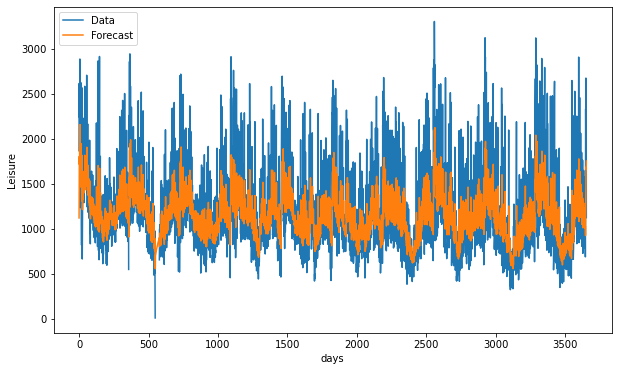

In [35]:
plt.figure(figsize=(10,6))
plt.plot(feature2, label='Data')
plt.plot(results2.predict(), label='Forecast')
plt.xlabel("days")
plt.ylabel("Leisure")
plt.legend()
plt.savefig("Leisure_forecast")